In [4]:
import pandas as pd
import numpy as np

%matplotlib inline


req311 = pd.read_csv("dataset.csv").dropna().sort_values("NEIGHBORHOOD")
Req311 = req311["NEIGHBORHOOD"].unique().tolist()

<AxesSubplot:xlabel='NEIGHBORHOOD'>

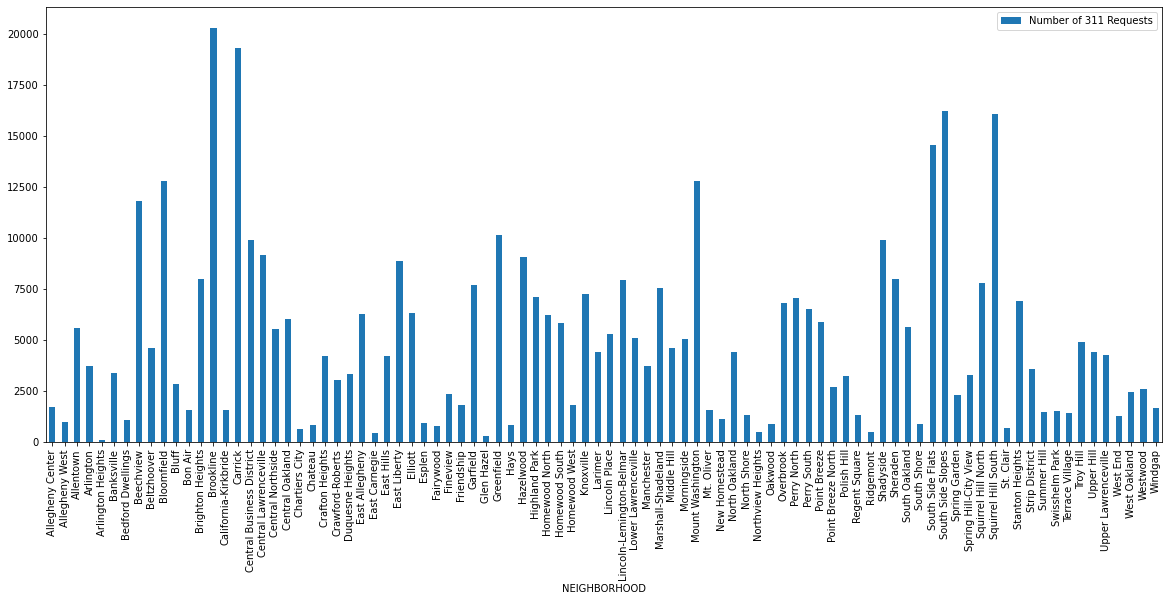

In [25]:
Total = []
for r in range(90):
    Total.append(0)
    
for r in range(len(req311)):
    neighborhood = req311.iloc[r,6]
    i = Req311.index(neighborhood)
    Total[i]+=1
    
ReqNum = [[]]
for i in range(90):
    ReqNum[i].append(Req311[i])
    ReqNum[i].append(Total[i])
    
    ReqNum.insert(i+1, [])

del ReqNum[90]

Req311Total = pd.DataFrame(ReqNum, columns=["NEIGHBORHOOD", "Number of 311 Requests"])

Req311Total.plot.bar(x="NEIGHBORHOOD", figsize=(20,8))

In [56]:
Scores = Req311Total['Number of 311 Requests'].tolist()
ScoreList = []

for r in range(90):
    ScoreList.append(0)
    
for r in range(90):
    if Scores[r] < 500:
        ScoreList[r] = 5
    elif 500 < Scores[r] < 1000:
        ScoreList[r] = 3
    elif 1000 < Scores[r] < 10000:
        ScoreList[r] = 1
    else:
        ScoreList[r] = 0
ScoreNum = [[]]
for i in range(90) : #Rearrange the data again for the dataframe
    ScoreNum[i].append(Req311[i])
    ScoreNum[i].append(ScoreList[i])
    
    ScoreNum.insert(i+1, [])
    
del ScoreNum[90]

ReqScores = pd.DataFrame(ScoreNum, columns = ["NEIGHBORHOOD", "Score"])
ReqScores = ReqScores.sort_values("Score", ascending = False).head(10)

ReqScores

,NEIGHBORHOOD,Score
35,Glen Hazel,5
4,Arlington Heights,5
66,Ridgemont,5
57,Northview Heights,5
26,East Carnegie,5
70,South Shore,3
1,Allegheny West,3
30,Esplen,3
37,Hays,3
58,Oakwood,3
